In [1]:
#Python For Finance Portfolio Optimization [https://www.youtube.com/watch?v=9fjs8FeLMJk&list=WL&index=1] 
#Optimizing users' portfolio using EF

In [2]:
import pandas as pd 
from pandas_datareader import data as web 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
#Get the tickers (stock symbols) in the portfolio 
#MAANG 
assets = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'] 

In [4]:
#Assigning weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
#Get the portfolio stock starting date 
stockStartDate = '2013-01-01'

In [6]:
#Get the stock ending date 
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-09-16'

In [7]:
#Creating a dataframe to store the adjusted closing price of the stocks
df = pd.DataFrame()

In [8]:
#Store the price 
df = yf.download(assets, start=stockStartDate, end=today)['Adj Close']

#Show the df
df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02 00:00:00+00:00,16.705702,12.865500,17.969599,27.942579,13.144286
2013-01-03 00:00:00+00:00,16.494833,12.924000,17.980036,27.713053,13.798571
2013-01-04 00:00:00+00:00,16.035376,12.957500,18.335327,28.701021,13.711429
2013-01-07 00:00:00+00:00,15.941053,13.423000,18.255327,29.359669,14.171429
2013-01-08 00:00:00+00:00,15.983961,13.319000,18.219299,29.000406,13.880000
...,...,...,...,...,...
2024-09-09 00:00:00+00:00,220.910004,175.399994,149.539993,504.790009,675.419983
2024-09-10 00:00:00+00:00,220.110001,179.550003,150.009995,504.790009,673.619995
2024-09-11 00:00:00+00:00,222.660004,184.520004,152.149994,511.829987,681.469971


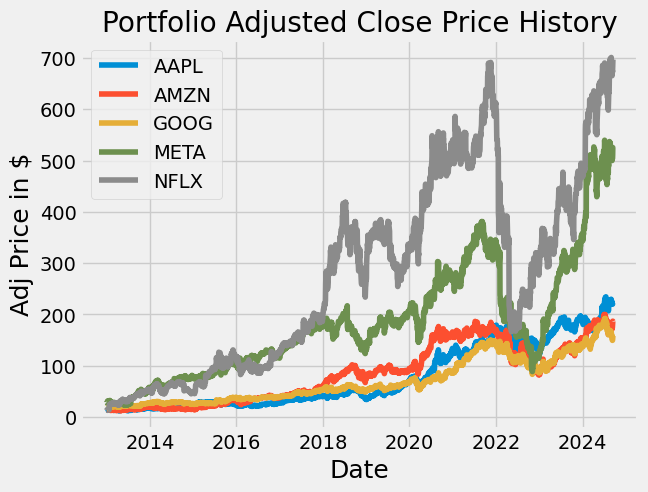

In [9]:
#Visualizing the stocks 
title = "Portfolio Adjusted Close Price History"

#Get the stocks
my_stocks = df 

#Create & plot the graph 
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Price in $', fontsize=18)
plt.legend(my_stocks.columns.values)
plt.show()

In [10]:
#Daily simple Returns
returns = df.pct_change()
returns

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00+00:00,-0.012623,0.004547,0.000581,-0.008214,0.049777
2013-01-04 00:00:00+00:00,-0.027855,0.002592,0.019760,0.035650,-0.006315
2013-01-07 00:00:00+00:00,-0.005882,0.035925,-0.004363,0.022949,0.033549
2013-01-08 00:00:00+00:00,0.002692,-0.007748,-0.001974,-0.012237,-0.020565
...,...,...,...,...,...
2024-09-09 00:00:00+00:00,0.000408,0.023397,-0.015731,0.009035,0.014494
2024-09-10 00:00:00+00:00,-0.003621,0.023660,0.003143,0.000000,-0.002665
2024-09-11 00:00:00+00:00,0.011585,0.027680,0.014266,0.013946,0.011653


In [11]:
 #Annualized covariance matrix 
cov_matrix = returns.cov() * 252
cov_matrix

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.079159,0.044821,0.042880,0.050237,0.041435
AMZN,0.044821,0.104952,0.055410,0.068318,0.069824
GOOG,0.042880,0.055410,0.075495,0.061347,0.052974
META,0.050237,0.068318,0.061347,0.147647,0.070706
NFLX,0.041435,0.069824,0.052974,0.070706,0.212118


In [12]:
#Portfolio variance 
port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
port_var

0.06941104541332523

In [13]:
#Portfolio Volatility (SD)
port_volt = np.sqrt(port_var)
port_volt

0.26345976052013187

In [14]:
#Annual Portfolio Return 
port_annual_ret = np.sum(returns.mean() * weights) * 252 
port_annual_ret

0.3073799733319747

In [15]:
#Expected Annual Return, Variance & Volatility (Risk) 
per_ret = str(round(port_annual_ret, 2) * 100) + '%' 
per_volt = str(round(port_volt, 2) * 100) + '%' 
per_var = str(round(port_var, 2) * 100) + '%' 

print('Expected Annual Return: ' + per_ret)
print('Annual Volatility(Risk): ' + per_volt)
print('Annual Variance: ' + per_var)

Expected Annual Return: 31.0%
Annual Volatility(Risk): 26.0%
Annual Variance: 7.000000000000001%


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models
from pypfopt import expected_returns 

In [17]:
#Exp Returns & Annualized sample covariance matrix of asset returns 
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [18]:
#Optimize for max SR 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.45599), ('AMZN', 0.11892), ('GOOG', 0.0), ('META', 0.11372), ('NFLX', 0.31137)])
Expected annual return: 30.2%
Annual volatility: 27.3%
Sharpe Ratio: 1.04


(0.30221053530886255, 0.27254496485474705, 1.0354641314297137)

In [19]:
#Get the discrete allocation of each share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices 

latest_prices = get_latest_prices(df) 
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000) #amt of money we willing to put in the portfolio 

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AAPL': 30, 'AMZN': 10, 'META': 3, 'NFLX': 7}
Funds Remaining: $6.82
